## Final Project Submission


* Student name: Gregory Antony Mikuro
* Student pace: Full Time
* Scheduled project review date/time: 22/03/2024
* Instructor name: Nikita Njoroge
* Blog post URL: 


# Import Statements

In [1732]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile 
import sqlite3

%matplotlib inline

## 1. Data Preparation - Extraction and Cleaning 

### 1.1 Box Office Mojo 

#### 1.1.1 Data Extraction

In [1733]:
# Read the compressed CSV file
bom_df = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

# Display the contents of the DataFrame
bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [1734]:
# note: Display the last 5 rows of the 'bom_df' DataFrame
bom_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


#### 1.1.2 Data Cleaning 

In [1735]:
# Check the information and missing values in the DataFrame
bom_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [1736]:

# Convert the 'foreign_gross' column to string
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype(str)

# Remove the comma from the 'foreign_gross' column before converting it to float
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(',', '').astype(float)



In [1737]:
# Check the information and missing values in the DataFrame
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [1738]:
cleaned_bom_df = bom_df.copy()

# Drop rows with missing values in the 'title' column
cleaned_bom_df = cleaned_bom_df.dropna(subset=['title'])

# Drop rows with missing values in the 'studio' column
cleaned_bom_df = cleaned_bom_df.dropna(subset=['studio'])

# Fill missing values in the 'domestic_gross' column with the median value
cleaned_bom_df['domestic_gross'].fillna(cleaned_bom_df['domestic_gross'].median(), inplace=True)

# Fill missing values in the 'foreign_gross' column with the median value
cleaned_bom_df['foreign_gross'].fillna(cleaned_bom_df['foreign_gross'].median(), inplace=True)

# Convert the 'domestic_gross' column to integer data type
cleaned_bom_df['domestic_gross'] = cleaned_bom_df['domestic_gross'].astype(int)

# Convert the 'foreign_gross' column to integer data type
cleaned_bom_df['foreign_gross'] = cleaned_bom_df['foreign_gross'].astype(int)

# Reset the index of the DataFrame
cleaned_bom_df.reset_index(drop=True, inplace=True)

cleaned_bom_df = cleaned_bom_df[(cleaned_bom_df['domestic_gross'] != 0) & (cleaned_bom_df['foreign_gross'] != 0)]


# Display the first 5 rows of the cleaned DataFrame
cleaned_bom_df



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010
...,...,...,...,...,...
3377,The Quake,Magn.,6200,18700000,2018
3378,Edward II (2018 re-release),FM,4800,18700000,2018
3379,El Pacto,Sony,2500,18700000,2018
3380,The Swan,Synergetic,2400,18700000,2018


In [1739]:

# Check the information and missing values in the DataFrame
cleaned_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3381
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3382 non-null   object
 1   studio          3382 non-null   object
 2   domestic_gross  3382 non-null   int32 
 3   foreign_gross   3382 non-null   int32 
 4   year            3382 non-null   int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 132.1+ KB


In [1740]:
# Create a new column 'worldwide_gross' that is the sum of 'domestic_gross' and 'foreign_gross'
cleaned_bom_df['worldwide_gross'] = cleaned_bom_df['domestic_gross'] + cleaned_bom_df['foreign_gross']

cleaned_bom_df

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
...,...,...,...,...,...,...
3377,The Quake,Magn.,6200,18700000,2018,18706200
3378,Edward II (2018 re-release),FM,4800,18700000,2018,18704800
3379,El Pacto,Sony,2500,18700000,2018,18702500
3380,The Swan,Synergetic,2400,18700000,2018,18702400


### 1.2 IMDB

#### 1.2.1 Data Extraction

In [1741]:

# Extract the IMDB database file from the zip archive
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')



In [1742]:
# Connect to the SQLite database file
con = sqlite3.connect('zippedData/im.db')

# Define the SQL query to retrieve all tables in the database
query = """SELECT * FROM sqlite_master"""

# Execute the query and store the result in a DataFrame
tables = pd.read_sql(query, con)

# Display the contents of the DataFrame
tables



,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [1743]:
# Define the SQL query to retrieve the movie_ratings table
query_movie_ratings = "SELECT * FROM movie_ratings"

# Execute the query and store the result in a DataFrame
movie_ratings = pd.read_sql(query_movie_ratings, con)

# Display the contents of the DataFrame
movie_ratings




,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [1744]:
# Define the SQL query to retrieve the movie_basics table
query_movie_basics = "SELECT * FROM movie_basics"


# Execute the query and store the result in a DataFrame
movie_basics = pd.read_sql(query_movie_basics, con)

# Display the contents of the DataFrame
movie_basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


#### 1.2.2 Data Cleaning

In [1745]:
# Define the SQL query
query_movie_basics = "SELECT * FROM movie_basics"

# Execute the query and store the results in a DataFrame
movie_basics = pd.read_sql_query(query_movie_basics, con)

# Display the information about the DataFrame
movie_basics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [1746]:
# Merge movie_ratings and movie_basics on 'movie_id' column
combined_im_df = movie_ratings.merge(movie_basics, on='movie_id')
combined_im_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81.0,Documentary


In [1747]:
def get_combined_im_info():
    """
    This function prints the information about the combined_im_df DataFrame.

    Note: The combined_im_df DataFrame contains data related to box office insights.
    """
    combined_im_df.info()

get_combined_im_info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [1748]:
# Drop rows with missing values in the 'runtime_minutes' column
combined_im_df = combined_im_df.dropna(subset=['runtime_minutes']).copy()

# Fill missing values in the 'genres' column with a default value
combined_im_df.loc[:, 'genres'].fillna('Unknown', inplace=True)

# Convert the 'start_year' column to string data type
combined_im_df.loc[:, 'start_year'] = combined_im_df['start_year'].astype(str)

# Convert the 'runtime_minutes' column to integer data type
combined_im_df.loc[:, 'runtime_minutes'] = combined_im_df['runtime_minutes'].astype(int)

# Reset the index of the DataFrame
combined_im_df.reset_index(drop=True, inplace=True)

combined_im_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66236 entries, 0 to 66235
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   averagerating    66236 non-null  float64
 2   numvotes         66236 non-null  int64  
 3   primary_title    66236 non-null  object 
 4   original_title   66236 non-null  object 
 5   start_year       66236 non-null  object 
 6   runtime_minutes  66236 non-null  int32  
 7   genres           66236 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 3.8+ MB


In [1749]:
def my_function():
    """
    This function returns the combined_im_df dataframe.

    Returns:
    combined_im_df (pandas.DataFrame): The combined dataframe containing box office insights.
    """
    return combined_im_df
    
combined_im_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...
66231,tt9768966,8.6,27,Plugged in,Plugged in,2019,53,Documentary
66232,tt9805820,8.1,25,Caisa,Caisa,2018,84,Documentary
66233,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120,"Action,Animation,Sci-Fi"
66234,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81,Documentary


In [1750]:
# Check if the 'genres' column exists in the DataFrame
if 'genres' in combined_im_df.columns:
    # Split the 'genres' column into multiple columns
    combined_im_df[['Genre1', 'Genre2', 'Genre3']] = combined_im_df['genres'].str.split(',', expand=True)

# Display the updated DataFrame
combined_im_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Genre1,Genre2,Genre3
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117,Romance,Romance,None,None
1,tt10384606,8.9,559,Borderless,Borderless,2019,87,Documentary,Documentary,None,None
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90,Drama,Drama,None,None
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73,"Mystery,Thriller",Mystery,Thriller,None
...,...,...,...,...,...,...,...,...,...,...,...
66231,tt9768966,8.6,27,Plugged in,Plugged in,2019,53,Documentary,Documentary,None,None
66232,tt9805820,8.1,25,Caisa,Caisa,2018,84,Documentary,Documentary,None,None
66233,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120,"Action,Animation,Sci-Fi",Action,Animation,Sci-Fi
66234,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81,Documentary,Documentary,None,None


In [1751]:
# This code calls the `info()` method on the `combined_im_df` DataFrame to retrieve information about its structure and data types.

combined_im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66236 entries, 0 to 66235
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   averagerating    66236 non-null  float64
 2   numvotes         66236 non-null  int64  
 3   primary_title    66236 non-null  object 
 4   original_title   66236 non-null  object 
 5   start_year       66236 non-null  object 
 6   runtime_minutes  66236 non-null  int32  
 7   genres           66236 non-null  object 
 8   Genre1           66236 non-null  object 
 9   Genre2           34877 non-null  object 
 10  Genre3           17840 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 5.3+ MB


In [1752]:
# Define the columns to drop from the DataFrame
columns_to_drop = ['Genre2', 'Genre3']

# Check if the columns exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in combined_im_df.columns]

# Drop the columns from the DataFrame
combined_im_df.drop(columns_to_drop, axis=1, inplace=True)

# Display the updated DataFrame
combined_im_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Genre1
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117,Romance,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87,Documentary,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90,Drama,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99,"Action,Adventure,Fantasy",Action
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73,"Mystery,Thriller",Mystery
...,...,...,...,...,...,...,...,...,...
66231,tt9768966,8.6,27,Plugged in,Plugged in,2019,53,Documentary,Documentary
66232,tt9805820,8.1,25,Caisa,Caisa,2018,84,Documentary,Documentary
66233,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120,"Action,Animation,Sci-Fi",Action
66234,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81,Documentary,Documentary


In [1753]:
# This code calls the `info()` method on the `combined_im_df` DataFrame to retrieve information about its structure and data types.

combined_im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66236 entries, 0 to 66235
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   averagerating    66236 non-null  float64
 2   numvotes         66236 non-null  int64  
 3   primary_title    66236 non-null  object 
 4   original_title   66236 non-null  object 
 5   start_year       66236 non-null  object 
 6   runtime_minutes  66236 non-null  int32  
 7   genres           66236 non-null  object 
 8   Genre1           66236 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 4.3+ MB


### 1.3 TheMovieDB

#### 1.3.1 Data Extraction 

In [1754]:
# Read the compressed CSV file
tmdb_df = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

# Display the contents of the DataFrame
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### 1.3.2 Data Cleaning

In [1755]:
# Check the information and missing values in the DataFrame
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [1756]:

# Extract genre_ids from tmdb_df and convert them to a list of integers
genre_ids_list = []
for row in tmdb_df['genre_ids']:
    if row == '[]':
        genre_ids_list.append([])
    else:
        genre_ids_list.append([int(genre_id) for genre_id in row.strip('[]').split(', ')])


# Extract the primary genres from genre_ids_list
primary_genres = [genre_ids[0] if genre_ids else None for genre_ids in genre_ids_list]

# Create the updated_pk_tmdb_df DataFrame with the new column
updated_pk_tmdb_df = tmdb_df.copy()
updated_pk_tmdb_df['primary_genre'] = primary_genres

# Replace non-finite values with a default value
updated_pk_tmdb_df['primary_genre'] = updated_pk_tmdb_df['primary_genre'].fillna(-1)

# Convert the column to integers
updated_pk_tmdb_df['primary_genre'] = updated_pk_tmdb_df['primary_genre'].astype(int)

#show the updated DataFrame
updated_pk_tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,primary_genre
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28


In [1757]:

# display the last 5 rows of the 'updated_pk_tmdb_df' DataFrame

updated_pk_tmdb_df.tail()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,primary_genre
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1,27
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1,18
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1,14
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1,10751
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1,53


In [1758]:
#Summarize the concise information about the structure and data types of updated_pk_tmdb_df.

updated_pk_tmdb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
 10  primary_genre      26517 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 2.1+ MB


The code for the genre IDs was discovered on a forum discussion page hosted on themoviedb.org. The forum discussion, located at the provided URL, likely contained a conversation or thread where users shared information about how to access and utilize genre IDs within the Movie Database API. These genre IDs are essential for categorizing movies into different genres and are commonly used in various applications and services that interact with movie databases, including analysis, recommendation systems, and more.

https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

In [1759]:
# Define dictionary mapping integer values to genre names
backwards_key = {
    '28': 'Action',
    '12': 'Adventure',
    '16': 'Animation',
    '35': 'Comedy',
    '80': 'Crime',
    '99': 'Documentary',
    '18': 'Drama',
    '10751': 'Family',
    '14': 'Fantasy',
    '36': 'History',
    '27': 'Horror',
    '10402': 'Music',
    '9648': 'Mystery',
    '10749': 'Romance',
    '878': 'Science Fiction',
    '10770': 'TV Movie',
    '53': 'Thriller',
    '10752': 'War',
    '37': 'Western'
}

# Replace integer values in 'primary_genre' column with genre names
updated_pk_tmdb_df['primary_genre_name'] = updated_pk_tmdb_df['primary_genre'].astype(str).replace(backwards_key)

# Display the updated DataFrame
updated_pk_tmdb_df.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,primary_genre,primary_genre_name
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,Adventure
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14,Fantasy
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,12,Adventure
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16,Animation
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28,Action


In [1760]:

# Convert the 'release_date' column to datetime format

updated_pk_tmdb_df['release_date'] = pd.to_datetime(updated_pk_tmdb_df['release_date'])


In [1761]:
## Display the last few rows of the DataFrame updated_pk_tmdb_df.

updated_pk_tmdb_df.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,primary_genre,primary_genre_name
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1,27,Horror
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1,18,Drama
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1,14,Fantasy
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1,10751,Family
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1,53,Thriller


In [1762]:
## Summarize essential information about the structure and data types of updated_pk_tmdb_df.

updated_pk_tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          26517 non-null  int64         
 1   genre_ids           26517 non-null  object        
 2   id                  26517 non-null  int64         
 3   original_language   26517 non-null  object        
 4   original_title      26517 non-null  object        
 5   popularity          26517 non-null  float64       
 6   release_date        26517 non-null  datetime64[ns]
 7   title               26517 non-null  object        
 8   vote_average        26517 non-null  float64       
 9   vote_count          26517 non-null  int64         
 10  primary_genre       26517 non-null  int32         
 11  primary_genre_name  26517 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(5)
memory usage: 2.3+ MB


### 1.4 The Numbers

#### 1.4.1 Data Extraction

In [1763]:
# Read the compressed CSV file
tn_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

# Display the contents of the DataFrame
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [1764]:
# Check the information and missing values in the DataFrame
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### 1.4.2 Data Cleaning

In [1765]:

# Convert the columns to string type
tn_df['production_budget'] = tn_df['production_budget'].astype(str)
tn_df['domestic_gross'] = tn_df['domestic_gross'].astype(str)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].astype(str)

# Remove the '$' and ',' characters and convert the columns to int64 type
tn_df['production_budget'] = tn_df['production_budget'].str.replace('$', '').str.replace(',', '').astype('int64')
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype('int64')
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype('int64')





In [1766]:

# Convert the 'release_date' column to datetime format
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])



In [1767]:
# Removes rows from the DataFrame 'tn_df' where both 'domestic_gross' and 'worldwide_gross' columns have a value of zero 

tn_df = tn_df.drop(tn_df[(tn_df['domestic_gross'] == 0) & (tn_df['worldwide_gross'] == 0)].index)


In [1768]:
#Display concise summary information about the DataFrame tn_df.
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5415 non-null   int64         
 1   release_date       5415 non-null   datetime64[ns]
 2   movie              5415 non-null   object        
 3   production_budget  5415 non-null   int64         
 4   domestic_gross     5415 non-null   int64         
 5   worldwide_gross    5415 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 296.1+ KB


In [1769]:
# Create a new column 'foreign_gross' that is the difference between 'worldwide_gross' and 'domestic_gross'
tn_df['foreign_gross'] = tn_df['worldwide_gross'] - tn_df['domestic_gross']

# Drop rows with 0 in foreign_gross column
tn_df = tn_df[tn_df['foreign_gross'] != 0]

tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2015837654
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
...,...,...,...,...,...,...,...
5759,60,2006-06-02,The Puffy Chair,15000,194523,195254,731
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,1008
5774,75,2004-10-08,Primer,7000,424760,841926,417166
5775,76,2006-05-26,Cavite,7000,70071,71644,1573


## 2. Data Analysis and Visualisation 

### Clean DataFrames

* Box Office Mojo = cleaned_bom_df

* IMDB = combined_im_df

* TheMovieDB = updated_pk_tmdb_df

* TheNumbers = tn_df


### 2.1 Comparison on Domestic and Foreign Investment Performance

In [1770]:
# Create a new dataframe 'bom_performance_df' with the columns 'year', 'domestic_gross', 'foreign_gross', 'worldwide_gross', and 'title'

bom_performance_df = cleaned_bom_df[['year', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'title']].copy()

# correct the 'year' column to only contain the year
bom_performance_df['year'] = pd.to_datetime(bom_performance_df['year'], format='%Y').dt.year

# Display the first and last 5 rows of the DataFrame
bom_performance_df


,year,domestic_gross,foreign_gross,worldwide_gross,title
0,2010,415000000,652000000,1067000000,Toy Story 3
1,2010,334200000,691300000,1025500000,Alice in Wonderland (2010)
2,2010,296000000,664300000,960300000,Harry Potter and the Deathly Hallows Part 1
3,2010,292600000,535700000,828300000,Inception
4,2010,238700000,513900000,752600000,Shrek Forever After
...,...,...,...,...,...
3377,2018,6200,18700000,18706200,The Quake
3378,2018,4800,18700000,18704800,Edward II (2018 re-release)
3379,2018,2500,18700000,18702500,El Pacto
3380,2018,2400,18700000,18702400,The Swan


In [1771]:
bom_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3381
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             3382 non-null   int64 
 1   domestic_gross   3382 non-null   int32 
 2   foreign_gross    3382 non-null   int32 
 3   worldwide_gross  3382 non-null   int32 
 4   title            3382 non-null   object
dtypes: int32(3), int64(1), object(1)
memory usage: 118.9+ KB


In [1772]:
# Create a new DataFrame 'tn_performance_df' with the required columns

tn_performance_df = tn_df[['release_date', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'movie']].copy()

# Rename the movie column to title

tn_performance_df.rename(columns={'movie': 'title'}, inplace=True)

# Create a new column 'year' by extracting the year from the 'release_date' column

tn_performance_df['release_date'] = pd.to_datetime(tn_performance_df['release_date']).dt.year

# Rename the 'release_date' column to 'year'

tn_performance_df.rename(columns={'release_date': 'year'}, inplace=True)

# Display the first few rows of the DataFrame

tn_performance_df




,year,domestic_gross,foreign_gross,worldwide_gross,title
0,2009,760507625,2015837654,2776345279,Avatar
1,2011,241063875,804600000,1045663875,Pirates of the Caribbean: On Stranger Tides
2,2019,42762350,107000000,149762350,Dark Phoenix
3,2015,459005868,944008095,1403013963,Avengers: Age of Ultron
4,2017,620181382,696540365,1316721747,Star Wars Ep. VIII: The Last Jedi
...,...,...,...,...,...
5759,2006,194523,731,195254,The Puffy Chair
5773,1993,2040920,1008,2041928,El Mariachi
5774,2004,424760,417166,841926,Primer
5775,2006,70071,1573,71644,Cavite


In [1773]:
# Display the information about the DataFrame tn_performance_df

tn_performance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4163 entries, 0 to 5778
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             4163 non-null   int64 
 1   domestic_gross   4163 non-null   int64 
 2   foreign_gross    4163 non-null   int64 
 3   worldwide_gross  4163 non-null   int64 
 4   title            4163 non-null   object
dtypes: int64(4), object(1)
memory usage: 195.1+ KB


In [1774]:

# Concatenate the two dataframes vertically
performance_df = pd.concat([bom_performance_df, tn_performance_df], ignore_index=True)

# Display the combined dataframe
performance_df

,year,domestic_gross,foreign_gross,worldwide_gross,title
0,2010,415000000,652000000,1067000000,Toy Story 3
1,2010,334200000,691300000,1025500000,Alice in Wonderland (2010)
2,2010,296000000,664300000,960300000,Harry Potter and the Deathly Hallows Part 1
3,2010,292600000,535700000,828300000,Inception
4,2010,238700000,513900000,752600000,Shrek Forever After
...,...,...,...,...,...
7540,2006,194523,731,195254,The Puffy Chair
7541,1993,2040920,1008,2041928,El Mariachi
7542,2004,424760,417166,841926,Primer
7543,2006,70071,1573,71644,Cavite


In [1775]:
# Group by 'year' and calculate the sum of the gross values
gross_per_year_df = performance_df.groupby('year')[['domestic_gross', 'foreign_gross', 'worldwide_gross']].sum()

# Display the new DataFrame
gross_per_year_df

,domestic_gross,foreign_gross,worldwide_gross
year,,,
1915,10000000,1000000,11000000
1925,11000000,11000000,22000000
1929,2800000,1558000,4358000
1933,11438000,843650,12281650
1935,1782000,1420000,3202000
...,...,...,...
2015,21839959253,37052701218,58892660471
2016,22170595693,41351065639,63521661332
2017,21376236311,40579266937,61955503248


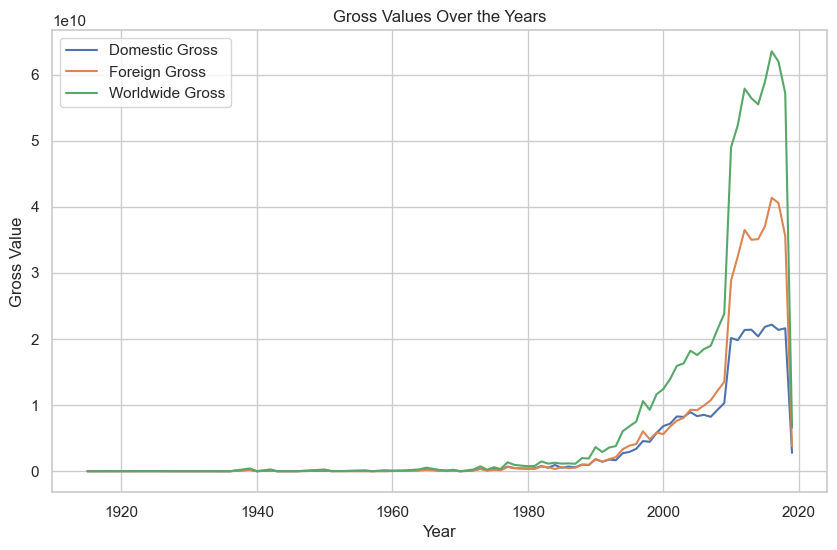

In [1776]:


# Create a line plot for each gross value
plt.figure(figsize=(10, 6))
plt.plot(gross_per_year_df.index, gross_per_year_df['domestic_gross'], label='Domestic Gross')
plt.plot(gross_per_year_df.index, gross_per_year_df['foreign_gross'], label='Foreign Gross')
plt.plot(gross_per_year_df.index, gross_per_year_df['worldwide_gross'], label='Worldwide Gross')

# Add title and labels
plt.title('Gross Values Over the Years')
plt.xlabel('Year')
plt.ylabel('Gross Value')

# Add a legend
plt.legend()

# Display the plot
plt.show()

### 2.2 Runtime VS Rating

In [1777]:
# Display the information about the 'combined_im_df' DataFrame

combined_im_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66236 entries, 0 to 66235
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   averagerating    66236 non-null  float64
 2   numvotes         66236 non-null  int64  
 3   primary_title    66236 non-null  object 
 4   original_title   66236 non-null  object 
 5   start_year       66236 non-null  object 
 6   runtime_minutes  66236 non-null  int32  
 7   genres           66236 non-null  object 
 8   Genre1           66236 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 4.3+ MB


##### Filter the DataFrame

First, I'll filter the DataFrame to include only movies with a `runtime_minutes` that falls within the specified quantiles.



In [1778]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Create a new column for the quantiles
conditions = [
    (combined_im_df['runtime_minutes'] < 95),
    (combined_im_df['runtime_minutes'] >= 95) & (combined_im_df['runtime_minutes'] < 105),
    (combined_im_df['runtime_minutes'] >= 105) & (combined_im_df['runtime_minutes'] < 115),
    (combined_im_df['runtime_minutes'] >= 115) & (combined_im_df['runtime_minutes'] < 125),
    (combined_im_df['runtime_minutes'] >= 125)
]
choices = ['<95', '95-104', '105-114', '115-124', '>=125']
combined_im_df['runtime_quantile'] = np.select(conditions, choices, default='other')

combined_im_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Genre1,runtime_quantile
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117,Romance,Romance,115-124
1,tt10384606,8.9,559,Borderless,Borderless,2019,87,Documentary,Documentary,<95
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90,Drama,Drama,<95
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99,"Action,Adventure,Fantasy",Action,95-104
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73,"Mystery,Thriller",Mystery,<95
...,...,...,...,...,...,...,...,...,...,...
66231,tt9768966,8.6,27,Plugged in,Plugged in,2019,53,Documentary,Documentary,<95
66232,tt9805820,8.1,25,Caisa,Caisa,2018,84,Documentary,Documentary,<95
66233,tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120,"Action,Animation,Sci-Fi",Action,115-124
66234,tt9886934,7.0,5,The Projectionist,The Projectionist,2019,81,Documentary,Documentary,<95




##### Calculate the Number of Movies

Next, I'll calculate the number of movies that have a rating of more than 7.5 in each of the quantiles.



In [1779]:
# Filter the DataFrame to include only movies with an averagerating of more than 7.5
imdb_filtered_df = combined_im_df[combined_im_df['averagerating'] > 7.5]

# Calculate the number of movies in each runtime quantile
movie_counts = imdb_filtered_df['runtime_quantile'].value_counts().loc[choices]

movie_counts

<95        8558
95-104     1723
105-114     908
115-124     683
>=125      1227
Name: runtime_quantile, dtype: int64



##### Create a Bar Plot

Finally, I'll create a bar plot of the number of movies in each quantile.



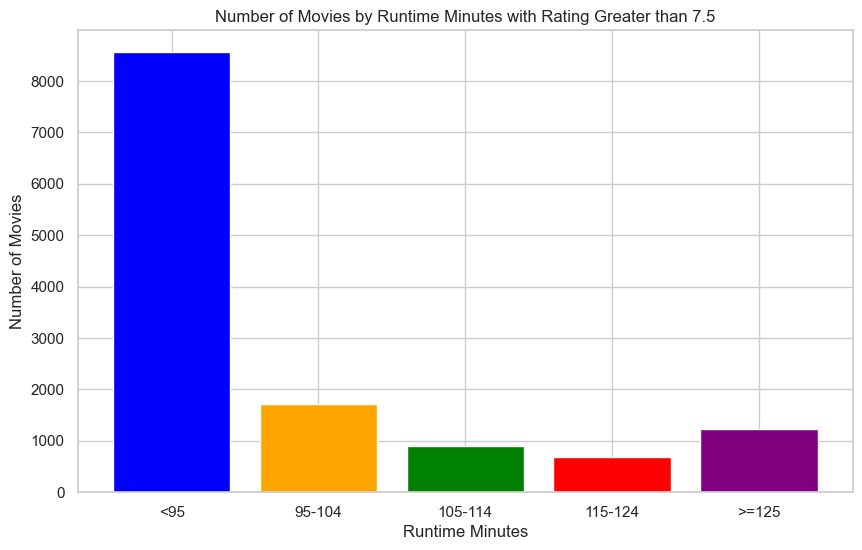

In [1780]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a bar graph to visualize the number of movies in each runtime quantile
plt.figure(figsize=(10, 6))
plt.bar(movie_counts.index, movie_counts.values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Number of Movies by Runtime Minutes with Rating Greater than 7.5')
plt.xlabel('Runtime Minutes')
plt.ylabel('Number of Movies')
plt.show()



This bar graph shows the number of movies in each runtime quantile. The x-axis represents the runtime minutes, and the y-axis represents the number of movies. Each bar in the graph represents a runtime quantile, with its height determined by the number of movies in that quantile. The bars are colored blue, orange, green, red, and purple respectively.

### 2.3 Genre VS Average Rating

#### Filter the DataFrame and Rename Column

First, I'll filter the `updated_pk_tmdb_df` DataFrame to include only movies with a `vote_average` of more than 7.5. Then, I'll rename the `vote_average` column to `average_rating`.



In [1781]:
# Filter the DataFrame to include only movies with a vote_average of more than 7.5
tmdb_filtered_df = updated_pk_tmdb_df[updated_pk_tmdb_df['vote_average'] > 7.5].copy()

# Rename the vote_average column to average_rating
tmdb_filtered_df.rename(columns={'vote_average': 'averagerating'}, inplace=True)



#### Rename Column in imdb_filtered_df

Next, I'll rename the `Genre1` column in `imdb_filtered_df` to `primary_genre_name`.



In [1782]:
# Rename some of the columns

imdb_filtered_df_copy = imdb_filtered_df.copy()

imdb_filtered_df_copy.rename(columns={'Genre1': 'primary_genre_name'}, inplace=True)


In [1783]:
# Display the summary rows of the 'imdb_filtered_df_copy' DataFrame

imdb_filtered_df_copy

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,primary_genre_name,runtime_quantile
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117,Romance,Romance,115-124
1,tt10384606,8.9,559,Borderless,Borderless,2019,87,Documentary,Documentary,<95
14,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133,"Biography,Drama,Sport",Biography,>=125
31,tt1287879,7.7,76,America Stripped,Stripped: Greg Friedler's Naked Las Vegas,2010,78,Documentary,Documentary,<95
37,tt1326743,8.4,21,California State of Mind: The Legacy of Pat Brown,California State of Mind: The Legacy of Pat Brown,2011,86,"Biography,Documentary",Biography,<95
...,...,...,...,...,...,...,...,...,...,...
66212,tt9367004,8.2,5,Up to the Last Drop: The Secret Water War in E...,Mehri tin teleftaia stagona: O mystikos polemo...,2017,58,Documentary,Documentary,<95
66219,tt9526152,7.6,29,DanMachi: Is It Wrong to Try to Pick Up Girls ...,Gekijouban danjon ni deai o motomeru no wa mac...,2019,82,"Action,Adventure,Animation",Action,<95
66221,tt9575726,7.7,161,Ir visi ju vyrai,Ir visi ju vyrai,2019,108,"Comedy,Romance",Comedy,105-114
66231,tt9768966,8.6,27,Plugged in,Plugged in,2019,53,Documentary,Documentary,<95


In [1784]:
# Display information on imdb_filtered_df_copy DataFrame

imdb_filtered_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13099 entries, 0 to 66232
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            13099 non-null  object 
 1   averagerating       13099 non-null  float64
 2   numvotes            13099 non-null  int64  
 3   primary_title       13099 non-null  object 
 4   original_title      13099 non-null  object 
 5   start_year          13099 non-null  object 
 6   runtime_minutes     13099 non-null  int32  
 7   genres              13099 non-null  object 
 8   primary_genre_name  13099 non-null  object 
 9   runtime_quantile    13099 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 1.0+ MB


In [1785]:
# Display tmdb_filtered_df DataFrame

tmdb_filtered_df 

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,averagerating,vote_count,primary_genre,primary_genre_name
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,12,Adventure
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,14,Fantasy
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,16,Animation
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,28,Action
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,16,Animation
...,...,...,...,...,...,...,...,...,...,...,...,...
26327,26327,[18],502710,en,His Favorite Person,0.600,2018-03-04,His Favorite Person,8.0,1,18,Drama
26328,26328,[18],492902,en,Wren Boys,0.600,2018-01-19,Wren Boys,8.0,2,18,Drama
26329,26329,[99],474062,en,The End of Meat,0.600,2018-09-04,The End of Meat,8.0,3,99,Documentary
26330,26330,[99],491080,pl,Over the Limit,0.600,2018-10-05,Over the Limit,7.8,5,99,Documentary


In [1786]:
# Display the information about the 'tmdb_filtered_df' DataFrame

tmdb_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4335 entries, 0 to 26331
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          4335 non-null   int64         
 1   genre_ids           4335 non-null   object        
 2   id                  4335 non-null   int64         
 3   original_language   4335 non-null   object        
 4   original_title      4335 non-null   object        
 5   popularity          4335 non-null   float64       
 6   release_date        4335 non-null   datetime64[ns]
 7   title               4335 non-null   object        
 8   averagerating       4335 non-null   float64       
 9   vote_count          4335 non-null   int64         
 10  primary_genre       4335 non-null   int32         
 11  primary_genre_name  4335 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(5)
memory usage: 423.3+ KB


#### Convert the 'id' Column to String and Rename it to 'movie_id'

I'll convert the 'id' column in `tmdb_filtered_df` to string and rename it to 'movie_id'.



In [1787]:
# Convert the 'id' column to string and rename it to 'movie_id'
tmdb_filtered_df['id'] = tmdb_filtered_df['id'].astype(str)
tmdb_filtered_df.rename(columns={'id': 'movie_id'}, inplace=True)



#### Select Required Columns

Next, I'll select the `averagerating` and `primary_genre_name` columns from both `tmdb_filtered_df` and `imdb_filtered_df_copy`.



In [1788]:
# Select the required columns if they exist
if 'primary_genre_name' in tmdb_filtered_df.columns:
    tmdb_filtered_df = tmdb_filtered_df[['movie_id', 'averagerating', 'primary_genre_name']]
if 'primary_genre_name' in imdb_filtered_df.columns:
    imdb_filtered_df = imdb_filtered_df_copy[['movie_id', 'averagerating', 'primary_genre_name']]




#### Concatenate the DataFrames

Finally, I'll concatenate the `tmdb_filtered_df` and `imdb_filtered_df` DataFrames to form a new DataFrame `argenre_df`.



In [1789]:
# Concatenate the DataFrames
argenre_df = pd.concat([tmdb_filtered_df, imdb_filtered_df_copy], ignore_index=True)

argenre_df = argenre_df[['movie_id', 'averagerating', 'primary_genre_name']]

argenre_df

,movie_id,averagerating,primary_genre_name
0,12444,7.7,Adventure
1,10191,7.7,Fantasy
2,862,7.9,Animation
3,27205,8.3,Action
4,10193,7.7,Animation
...,...,...,...
17429,tt9367004,8.2,Documentary
17430,tt9526152,7.6,Action
17431,tt9575726,7.7,Comedy
17432,tt9768966,8.6,Documentary


In [1790]:
# Drop unclear genres in primary_genre_name column

argenre_clean_df = argenre_df[(argenre_df['primary_genre_name'] != '-1') & (argenre_df['primary_genre_name'] != 'Unknown')]


In [1791]:
# Display summary and prevalence of genres

argenre_df['primary_genre_name'].value_counts()


Documentary        6626
Drama              3122
Comedy             2031
Biography          1202
Action              857
-1                  697
Adventure           601
Crime               383
Music               365
Animation           356
Thriller            224
Horror              201
Family              124
Romance             118
Unknown             109
Fantasy              82
Mystery              75
Science Fiction      62
History              40
Musical              39
Sport                27
Western              25
War                  24
Sci-Fi               23
TV Movie             19
Game-Show             1
Reality-TV            1
Name: primary_genre_name, dtype: int64

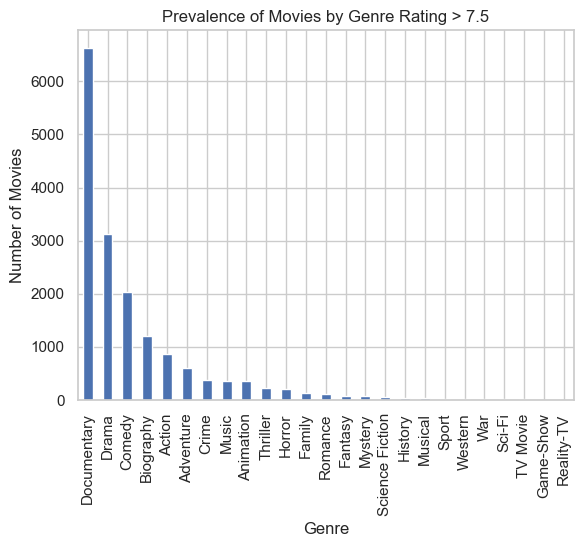

In [1792]:

# Count the number of movies in each genre
genre_counts = argenre_clean_df['primary_genre_name'].value_counts()

# Plot the bar graph
genre_counts.plot(kind='bar')

# Set the labels for x-axis and y-axis
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title("Prevalence of Movies by Genre Rating > 7.5")

# Display the plot
plt.show()



### 2.4 Production Budget Vs Gross Revenue

In [1793]:
# show summary information of from TheNumber cleaned df

tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2015837654
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
...,...,...,...,...,...,...,...
5759,60,2006-06-02,The Puffy Chair,15000,194523,195254,731
5773,74,1993-02-26,El Mariachi,7000,2040920,2041928,1008
5774,75,2004-10-08,Primer,7000,424760,841926,417166
5775,76,2006-05-26,Cavite,7000,70071,71644,1573


##### Filter rows for the years 2011 to 2020

Next, I'll filter the rows in `tn_df` where 'release_date' is between the years 2011 and 2020.



In [1794]:
# Filter rows for the years 2011 to 2020
tn_10_df = tn_df[(tn_df['release_date'].dt.year >= 2011) & (tn_df['release_date'].dt.year <= 2020)]

tn_10_df = tn_10_df.drop(tn_10_df[(tn_10_df['production_budget'] == 0) | (tn_10_df['domestic_gross'] == 0) | (tn_10_df['worldwide_gross'] == 0) | (tn_10_df['foreign_gross'] == 0)].index)

tn_10_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995
...,...,...,...,...,...,...,...
5650,51,2016-06-03,The Fits,170000,166425,169242,2817
5667,68,2012-04-27,Sound of My Voice,135000,408015,429448,21433
5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,1493107
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,18892064


##### Compute Correlation

First, I'll compute the correlation between the 'production_budget', 'domestic_gross', 'worldwide_gross', and 'foreign_gross' columns in `tn_10_df`.



In [1795]:
# Compute correlation
correlation = tn_10_df[['production_budget', 'domestic_gross', 'worldwide_gross', 'foreign_gross']].corr()

##### Visualize Correlation

Next, I'll visualize the correlation using a heatmap. I'll use the seaborn library for this.



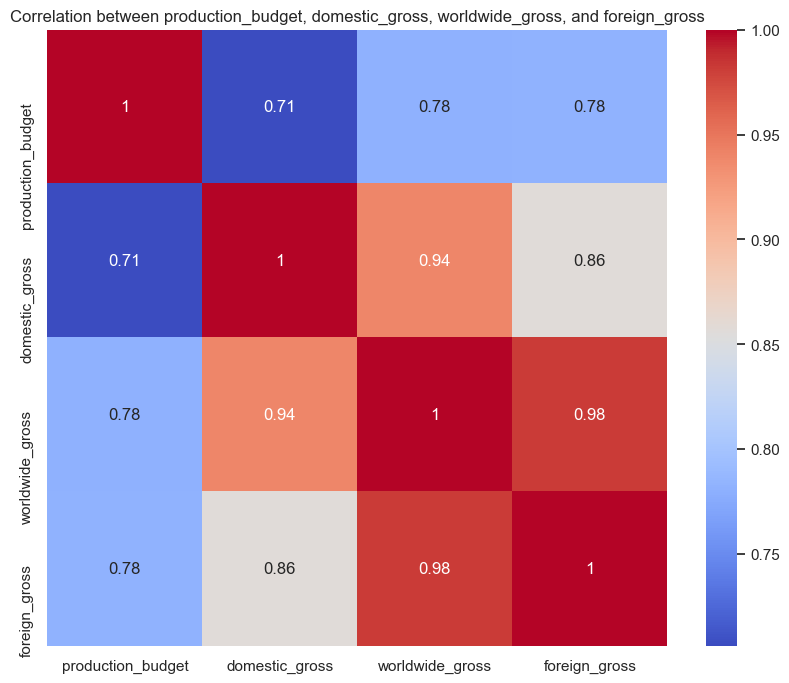

In [1796]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between production_budget, domestic_gross, worldwide_gross, and foreign_gross')
plt.show()



This heatmap visualizes the correlation between the 'production_budget', 'domestic_gross', 'worldwide_gross', and 'foreign_gross' columns in `tn_10_df`. The `annot=True` argument is used to write the data value in each cell. The `cmap='coolwarm'` argument is used to change the color map of the heatmap to 'coolwarm'.

Sure, let's break this down into several steps:

**Step 1: Calculate Quantiles**

First, we'll calculate the 25th, 50th, and 75th percentiles (also known as the first quartile, median, and third quartile) of the 'production_budget' column in `tn_10_df`. These values will be used to determine the low, medium, and high production budget values.



In [1797]:
# Calculate quantiles
low_budget = tn_10_df['production_budget'].quantile(0.25)
medium_budget = tn_10_df['production_budget'].quantile(0.5)
high_budget = tn_10_df['production_budget'].quantile(0.75)

# Print the values of the budget categories
print(f"Low Budget: {low_budget}")
print(f"Medium Budget: {medium_budget}")
print(f"High Budget: {high_budget}")

Low Budget: 10000000.0
Medium Budget: 26000000.0
High Budget: 60000000.0




**Step 2: Create Budget Categories**

Next, we'll create a new column 'budget_category' in `tn_10_df` that indicates whether the production budget is low, medium, or high.



In [1798]:
# create a new column 'budget_category' based on the production_budget

tn_10_df['budget_category'] = pd.cut(tn_10_df['production_budget'], bins=[0, low_budget, medium_budget, high_budget, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

tn_10_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,budget_category
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,Very High
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000,Very High
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,Very High
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,Very High
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995,Very High
...,...,...,...,...,...,...,...,...
5650,51,2016-06-03,The Fits,170000,166425,169242,2817,Low
5667,68,2012-04-27,Sound of My Voice,135000,408015,429448,21433,Low
5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,1493107,Low
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,18892064,Low


In [1799]:
# create a new column 'ROI' that calculates the return on investment

tn_10_df['ROI'] = (tn_10_df['worldwide_gross'] - tn_10_df['production_budget']) / tn_10_df['production_budget']
tn_10_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,budget_category,ROI
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,Very High,1.546673
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,107000000,Very High,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,Very High,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,Very High,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1116648995,Very High,5.710167
...,...,...,...,...,...,...,...,...,...
5650,51,2016-06-03,The Fits,170000,166425,169242,2817,Low,-0.004459
5667,68,2012-04-27,Sound of My Voice,135000,408015,429448,21433,Low,2.181096
5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,1493107,Low,24.754942
5679,80,2015-07-10,The Gallows,100000,22764410,41656474,18892064,Low,415.564740


In [1800]:
# create a summary of the average ROI for each budget category

average_roi = tn_10_df.groupby('budget_category')['ROI'].mean()

average_roi



budget_category
Low          6.435255
Medium       2.502693
High         1.786627
Very High    2.322205
Name: ROI, dtype: float64

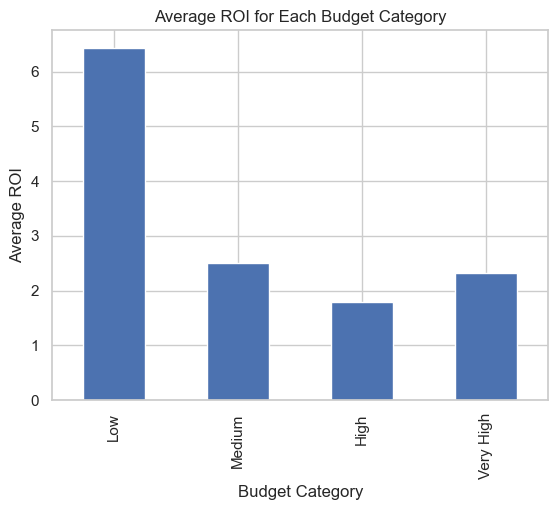

In [1801]:
# create a visual representation of the average ROI across different budget categories
average_roi.plot(kind='bar')
plt.xlabel('Budget Category')
plt.ylabel('Average ROI')
plt.title('Average ROI for Each Budget Category')
plt.show()
